## Homework

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 




In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv


--2025-10-16 08:27:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-16 08:27:42 (34.5 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [5]:
df = pd.read_csv('course_lead_scoring.csv')

In [6]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [10]:
for c in df.columns:
    if df[c].dtype == 'object':
       df[c] = df[c].fillna('NA')
    else:
         df[c] = df[c].fillna(0.0)

In [11]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`


In [12]:
df["industry"].value_counts().head()

industry
retail        203
finance       200
other         198
healthcare    187
education     187
Name: count, dtype: int64


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.




In [ ]:
# compute/use correlation matrix for numerical features and find the largest correlation among given pairs
if 'corr' not in globals():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    corr = df[numeric_cols].corr()

# display correlation matrix
print("Correlation matrix (numerical features):")
display(corr)

# candidates to compare
pairs = [
    ('interaction_count', 'lead_score'),
    ('number_of_courses_viewed', 'lead_score'),
    ('number_of_courses_viewed', 'interaction_count'),
    ('annual_income', 'interaction_count'),
]

# compute correlations and pick the pair with the largest absolute correlation
results = [(a, b, corr.loc[a, b]) for a, b in pairs]
best = max(results, key=lambda x: abs(x[2]))

print("\nCompared pairs and their correlation values:")
for a, b, val in results:
    print(f"{a} & {b}: {val:.6f}")

print(f"\nPair with the biggest correlation (by absolute value): {best[0]} and {best[1]} (corr = {best[2]:.6f})")

Correlation matrix (numerical features):


,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000



Compared pairs and their correlation values:
interaction_count & lead_score: 0.009888
number_of_courses_viewed & lead_score: -0.004879
number_of_courses_viewed & interaction_count: -0.023565
annual_income & interaction_count: 0.027036

Pair with the biggest correlation (by absolute value): annual_income and interaction_count (corr = 0.027036)


<Axes: >

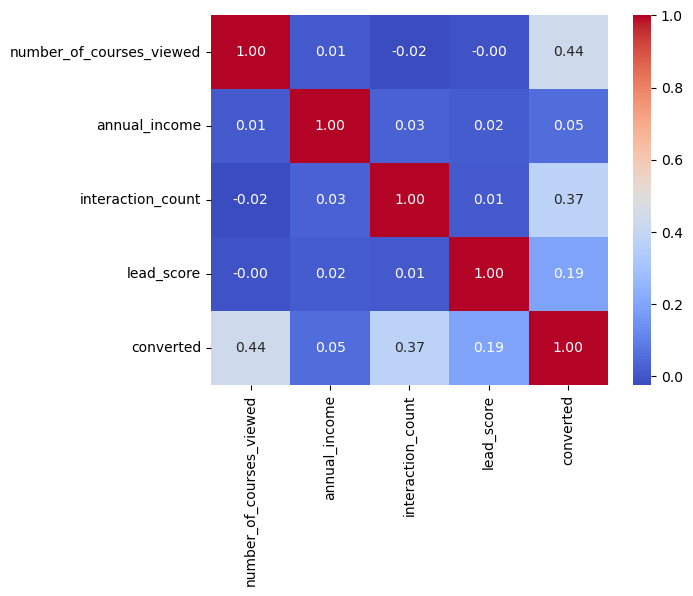

In [28]:

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')


### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.



### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source`
- `employment_status`



In [30]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
y_train = df_train.converted.values
y_val = df_val.converted.values 
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [33]:
def mutual_info_converted_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [57]:
cat = df_full_train.dtypes == 'object'
cat_col = df_full_train.columns[cat].tolist()
cat_col


['lead_source', 'industry', 'employment_status', 'location']

In [58]:
mi = {}
mi = df_full_train[cat_col].apply(mutual_info_converted_score)
mi = mi.sort_values(ascending=False)
mi

lead_source          0.025665
employment_status    0.013258
industry             0.011685
location             0.002253
dtype: float64

### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94



In [60]:
dv = DictVectorizer(sparse=False)


In [61]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [59]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=42)

In [62]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [64]:
y_pred = model.predict_proba(X_val)[:, 1]

In [67]:
# compute predicted classes from probabilities and evaluate accuracy on validation set
y_pred_class = (y_pred >= 0.5).astype(int)
accuracy = (y_pred_class == y_val).mean()
print(f"Validation accuracy: {accuracy:.2f}")

Validation accuracy: 0.70


### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`



### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

